# Data Ingestion Notebook
## Steel Industry Load Type Prediction

This notebook handles the data ingestion phase of our ML pipeline.

**Objectives:**
- Load the raw dataset
- Perform initial data exploration
- Basic data cleaning and preprocessing
- Save the ingested data for next phase

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Data Ingestion Phase Started")
print(f"Timestamp: {datetime.now()}")

Data Ingestion Phase Started
Timestamp: 2025-10-13 09:57:24.846780


## 1. Load Raw Data

In [2]:
# Load the dataset
try:
    df = pd.read_csv('Steel_industry_data.csv')
    print(f"✓ Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("❌ Error: Steel_industry_data.csv not found in the current directory")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✓ Data loaded successfully!
Dataset shape: (35040, 11)


## 2. Initial Data Exploration

In [3]:
# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

=== DATASET OVERVIEW ===
Number of rows: 35,040
Number of columns: 11

Column names:
 1. date
 2. Usage_kWh
 3. Lagging_Current_Reactive.Power_kVarh
 4. Leading_Current_Reactive_Power_kVarh
 5. CO2(tCO2)
 6. Lagging_Current_Power_Factor
 7. Leading_Current_Power_Factor
 8. NSM
 9. WeekStatus
10. Day_of_week
11. Load_Type


In [4]:
# Display first few rows
print("=== FIRST 5 ROWS ===")
df.head()

=== FIRST 5 ROWS ===


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
# Display data types and info
print("=== DATA TYPES AND INFO ===")
df.info()

=== DATA TYPES AND INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  

In [6]:
# Display basic statistics
print("=== STATISTICAL SUMMARY ===")
df.describe()

=== STATISTICAL SUMMARY ===


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


## 3. Target Variable Analysis

In [7]:
# Analyze target variable (Load_Type)
print("=== TARGET VARIABLE ANALYSIS ===")
print("\nLoad_Type distribution:")
load_type_counts = df['Load_Type'].value_counts()
print(load_type_counts)
print(f"\nPercentage distribution:")
print((load_type_counts / len(df) * 100).round(2))

=== TARGET VARIABLE ANALYSIS ===

Load_Type distribution:
Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

Percentage distribution:
Load_Type
Light_Load      51.58
Medium_Load     27.67
Maximum_Load    20.75
Name: count, dtype: float64


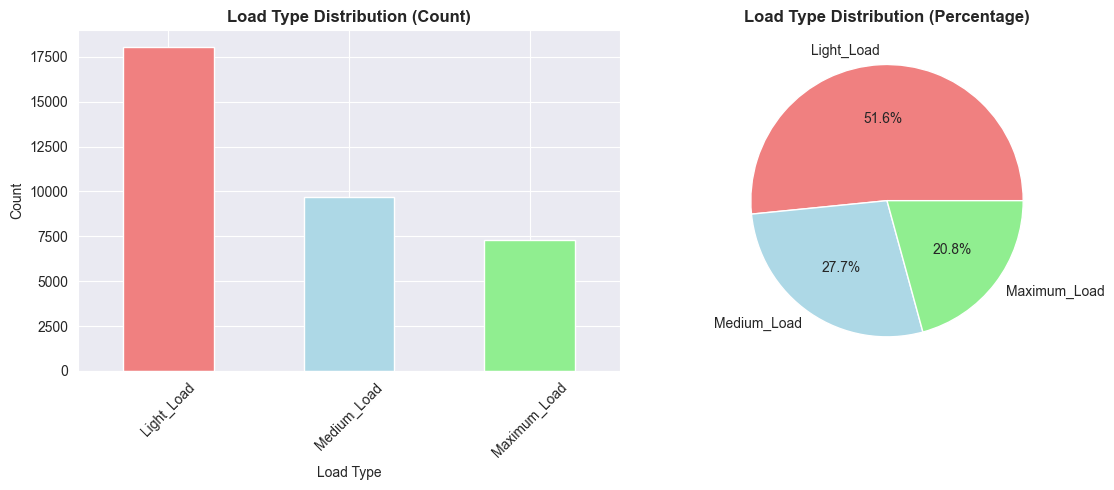

In [8]:
# Visualize target variable distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Load_Type'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Load Type Distribution (Count)', fontsize=12, fontweight='bold')
plt.xlabel('Load Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['Load_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Load Type Distribution (Percentage)', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

## 4. Feature Analysis

In [9]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Numerical columns (7): ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
Categorical columns (4): ['date', 'WeekStatus', 'Day_of_week', 'Load_Type']


In [10]:
# Check for missing values
print("=== MISSING VALUES CHECK ===")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print("Missing values per column:")
    print(missing_values[missing_values > 0])

=== MISSING VALUES CHECK ===
✓ No missing values found in the dataset!


In [11]:
# Check for duplicate rows
print("=== DUPLICATE ROWS CHECK ===")
duplicates = df.duplicated().sum()
if duplicates == 0:
    print("✓ No duplicate rows found!")
else:
    print(f"⚠️ Found {duplicates} duplicate rows")
    print("First few duplicate rows:")
    print(df[df.duplicated()].head())

=== DUPLICATE ROWS CHECK ===
✓ No duplicate rows found!


## 5. Date/Time Analysis

In [12]:
# Parse and analyze date column
print("=== DATE/TIME ANALYSIS ===")
if 'date' in df.columns:
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
    
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Total time span: {(df['date'].max() - df['date'].min()).days} days")
    
    # Extract additional time features for future use
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute
    
    print("✓ Date features extracted successfully")
else:
    print("No date column found")

=== DATE/TIME ANALYSIS ===
Date range: 2018-01-01 00:00:00 to 2018-12-31 23:45:00
Total time span: 364 days
✓ Date features extracted successfully


## 6. Categorical Features Analysis

In [13]:
# Analyze categorical features (excluding target)
categorical_features = [col for col in categorical_cols if col != 'Load_Type' and col != 'date']

print("=== CATEGORICAL FEATURES ANALYSIS ===")
for col in categorical_features:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

=== CATEGORICAL FEATURES ANALYSIS ===

WeekStatus:
WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64
Unique values: 2

Day_of_week:
Day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64
Unique values: 7


## 7. Correlation Analysis

=== CORRELATION ANALYSIS ===


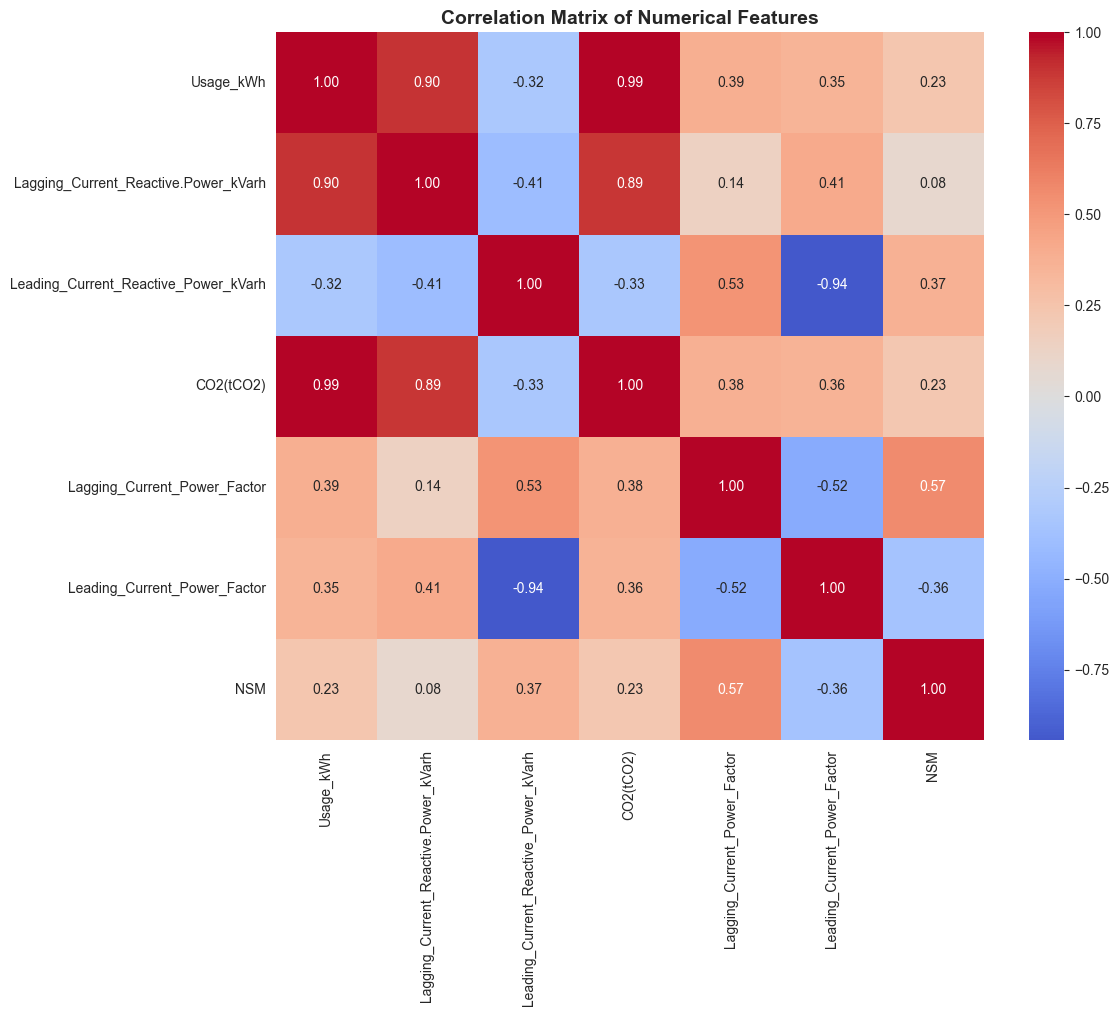


⚠️ Highly correlated feature pairs (|correlation| > 0.7):
Usage_kWh - Lagging_Current_Reactive.Power_kVarh: 0.896
Usage_kWh - CO2(tCO2): 0.988
Lagging_Current_Reactive.Power_kVarh - CO2(tCO2): 0.887
Leading_Current_Reactive_Power_kVarh - Leading_Current_Power_Factor: -0.944


In [14]:
# Create correlation matrix for numerical features
print("=== CORRELATION ANALYSIS ===")

# Select only numerical columns for correlation
numerical_features = [col for col in numerical_cols if col not in ['year', 'month', 'day', 'hour', 'minute']]

if len(numerical_features) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_features].corr()
    
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                fmt='.2f',
                square=True)
    plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated features
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:  # Threshold for high correlation
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      corr_value))
    
    if high_corr_pairs:
        print("\n⚠️ Highly correlated feature pairs (|correlation| > 0.7):")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"{feat1} - {feat2}: {corr:.3f}")
    else:
        print("\n✓ No highly correlated feature pairs found")
else:
    print("Not enough numerical features for correlation analysis")

## 8. Data Quality Checks

In [15]:
# Perform additional data quality checks
print("=== DATA QUALITY CHECKS ===")

# Check for infinite values
inf_count = df.select_dtypes(include=[np.number]).isin([np.inf, -np.inf]).sum().sum()
if inf_count == 0:
    print("✓ No infinite values found")
else:
    print(f"⚠️ Found {inf_count} infinite values")

# Check for negative values in features that shouldn't be negative
potential_positive_features = ['Usage_kWh', 'NSM']  # Add more as needed
for col in potential_positive_features:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"⚠️ Found {negative_count} negative values in {col}")
        else:
            print(f"✓ No negative values in {col}")

# Check data consistency
print("\n=== DATA CONSISTENCY CHECKS ===")
print(f"Date range consistency: {df['date'].is_monotonic_increasing if 'date' in df.columns else 'No date column'}")

=== DATA QUALITY CHECKS ===
✓ No infinite values found
✓ No negative values in Usage_kWh
✓ No negative values in NSM

=== DATA CONSISTENCY CHECKS ===
Date range consistency: False


## 9. Save Ingested Data

In [16]:
# Save the ingested and initially processed data
output_filename = 'ingested_data.csv'

try:
    # Save without index
    df.to_csv(output_filename, index=False)
    print(f"✓ Data successfully saved to {output_filename}")
    print(f"Final dataset shape: {df.shape}")
    
    # Verify the saved file
    test_df = pd.read_csv(output_filename)
    if test_df.shape == df.shape:
        print("✓ File integrity verified")
    else:
        print("⚠️ File integrity check failed")
        
except Exception as e:
    print(f"❌ Error saving data: {e}")

✓ Data successfully saved to ingested_data.csv
Final dataset shape: (35040, 16)
✓ File integrity verified


## 10. Data Ingestion Summary

In [17]:
# Generate data ingestion summary
print("" + "="*60 + "")
print("             DATA INGESTION SUMMARY")
print("" + "="*60 + "")
print(f"✓ Dataset loaded successfully: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"✓ Target variable: Load_Type with {df['Load_Type'].nunique()} classes")
print(f"✓ Target distribution: {dict(df['Load_Type'].value_counts())}")
print(f"✓ Numerical features: {len([col for col in df.select_dtypes(include=[np.number]).columns if col not in ['year', 'month', 'day', 'hour', 'minute']])}")
print(f"✓ Categorical features: {len([col for col in categorical_cols if col not in ['Load_Type', 'date']])}")
print(f"✓ Missing values: {df.isnull().sum().sum()}")
print(f"✓ Duplicate rows: {df.duplicated().sum()}")
print(f"✓ Date range: {df['date'].min().strftime('%Y-%m-%d') if 'date' in df.columns else 'N/A'} to {df['date'].max().strftime('%Y-%m-%d') if 'date' in df.columns else 'N/A'}")
print(f"✓ Output file: {output_filename}")
print("" + "="*60 + "")
print("Data Ingestion Phase Completed Successfully!")
print(f"Timestamp: {datetime.now()}")

             DATA INGESTION SUMMARY
✓ Dataset loaded successfully: 35,040 rows × 16 columns
✓ Target variable: Load_Type with 3 classes
✓ Target distribution: {'Light_Load': np.int64(18072), 'Medium_Load': np.int64(9696), 'Maximum_Load': np.int64(7272)}
✓ Numerical features: 7
✓ Categorical features: 2
✓ Missing values: 0
✓ Duplicate rows: 0
✓ Date range: 2018-01-01 to 2018-12-31
✓ Output file: ingested_data.csv
Data Ingestion Phase Completed Successfully!
Timestamp: 2025-10-13 09:57:26.040433
